### Задание 1

In [35]:
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

In [36]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [37]:
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [38]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [39]:
# print(boston["DESCR"])

In [40]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])
y.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [45]:
from sklearn.metrics import r2_score

# Коэффициент детерминации R2.
# Если значение коэффициента детерминации равно единице, это значит, что у нас идеальная модель
r2_score(y_test, y_pred)

0.71092035863262915

### Задание 2

In [46]:
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000,
# max_depth должен быть равен 12 и random_state сделайте равным 42.

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма
# одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно 
# применение массивов вместо датафрейма.

In [49]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [51]:
y_pred2 = model.predict(X_test)

r2_score(y_test.values[:, 0], y_pred2)

0.87580735465812154

In [52]:
# Вывод: модель из Задания 2 работает лучше, т.к. значение R2 ближе к единице.

### Задание 3

In [54]:
# Вызовите документацию для класса RandomForestRegressor,
# найдите информацию об атрибуте feature_importances_.
# С помощью этого атрибута найдите сумму всех показателей важности,
# установите, какие два признака показывают наибольшую важность.

help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [55]:
model.feature_importances_

array([ 0.03041796,  0.00153287,  0.00705227,  0.00117158,  0.01463026,
        0.40245231,  0.01427184,  0.06457307,  0.00515197,  0.01203962,
        0.01819018,  0.01256251,  0.41595357])

In [56]:
model.feature_importances_.sum()

0.99999999999999911

In [61]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [62]:
f = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    f[feature] = importance
f

{'AGE': 0.014271843661269899,
 'B': 0.012562513856776572,
 'CHAS': 0.0011715795470659189,
 'CRIM': 0.030417958572369879,
 'DIS': 0.064573071889098679,
 'INDUS': 0.0070522654308690751,
 'LSTAT': 0.41595356730305216,
 'NOX': 0.014630255118961925,
 'PTRATIO': 0.018190179488111906,
 'RAD': 0.0051519660570955132,
 'RM': 0.402452312714559,
 'TAX': 0.012039618171230235,
 'ZN': 0.0015328681895384806}

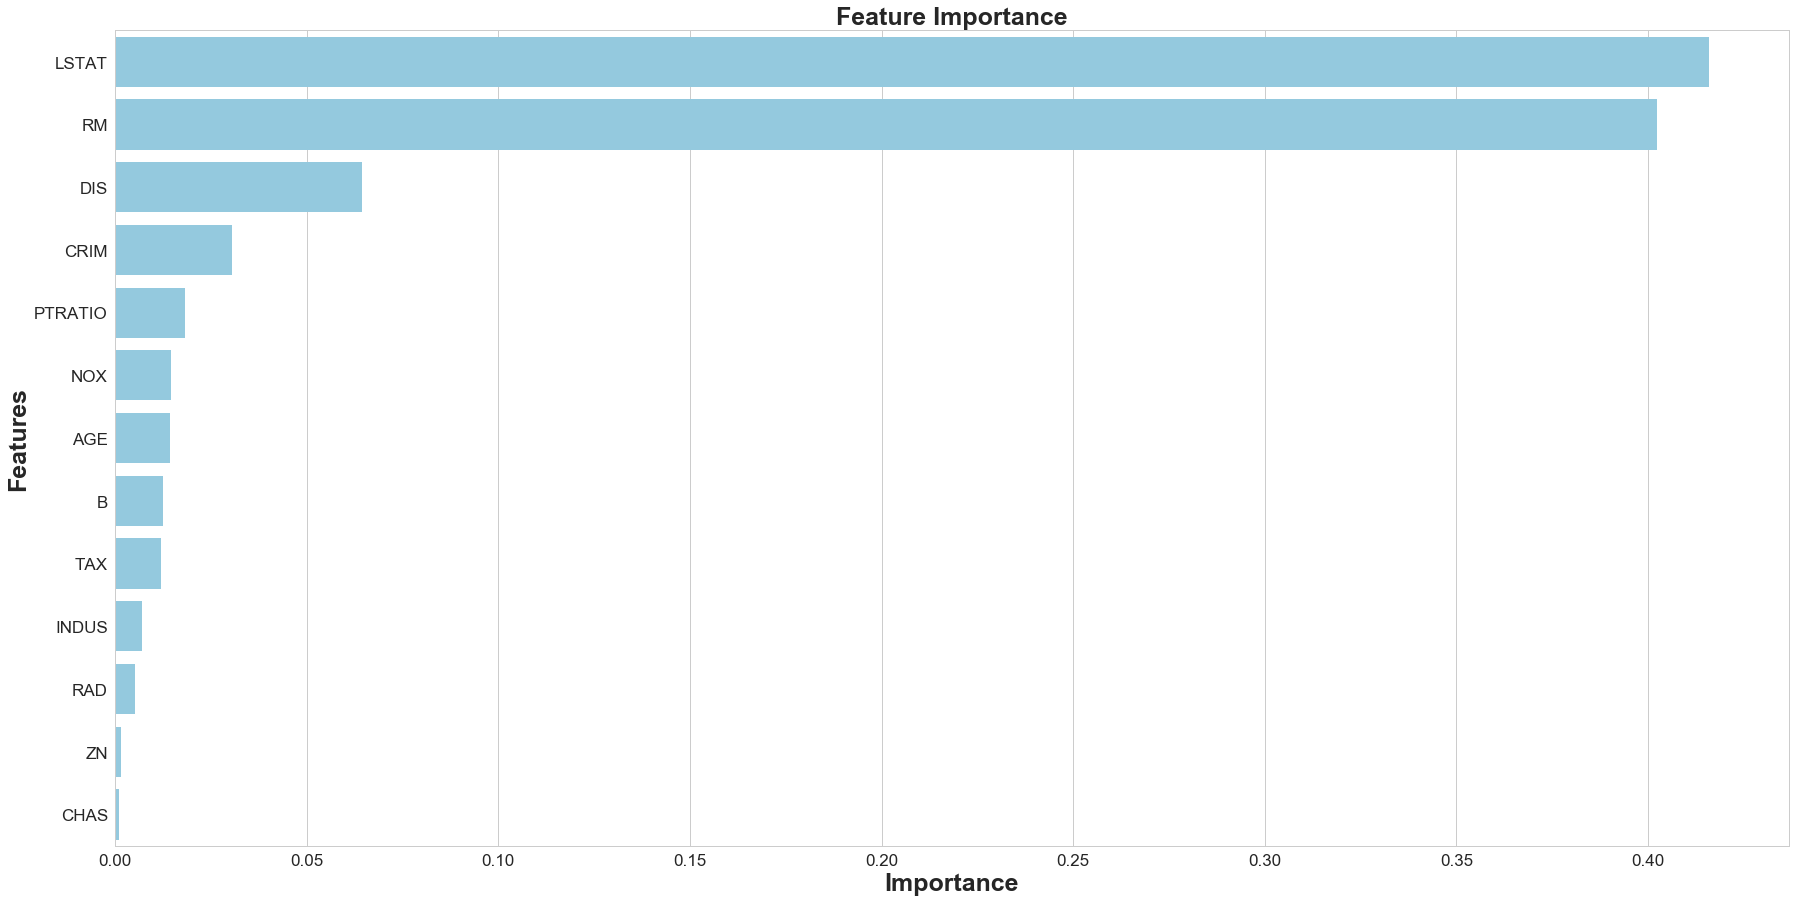

In [69]:
importances = pd.DataFrame.from_dict(f, orient='index').rename(columns={0: 'Boston-Importance'})
importances = importances.sort_values(by='Boston-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Boston-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()

In [70]:
# Наибольшую важность показывают два следующих признака: 
#   LSTAT - % lower status of the population (% более низкий статус населения)
#   RM - average number of rooms per dwelling (среднее количество комнат в одном жилом помещении)

print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      